In [3]:
# Parameters

S0 = 100
r = 0.05
sigma = 0.2
K = 100
T = 2
lmbda_t = 2
mu_J  = -0.02
sigma_J = 0.2

In [10]:
# Imports

import numpy as np
from math import factorial, exp, sqrt
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

# **Question 1**

En terminant le raisonnement du slide précédent, écrire la formule du pricing explicite du prix du call dans le modèle avec sauts.

D'après le slide précédent, nous avons:

$$
S_t = S_0 e^{(r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2}}{2})t + \sigma B_t}e^{\sum_{i=1}^{N_t}\log(1+Y_i)}
$$

et

$$
\log(\frac{S_t}{S_0}) | N_t = j\hookrightarrow \mathcal{N}((r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2}}{2})t + j\mu_J, \sigma^2t + j \sigma_J^2)
$$

On a donc:

$$
C(0, S_0) = \sum_{j=0}^{+ \infty} e^{-\tilde{\lambda}T}\frac{(\tilde{\lambda}T)^j}{j!}\mathbb{E}^{\mathbb{Q}}(e^{-rT}(S_0 e^{(r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2}}{2})T + \sigma B_T}e^{\sum_{i=1}^{j}\log(1+Y_i)} - K)_+)
$$

Or:

$$
(r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2}}{2})T + j\mu_J + \sqrt{\frac{\sigma^2T + j \sigma_J^2}{T}}B_T \hookrightarrow \mathcal{N}((r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2}}{2})T + j\mu_J, \sigma^2T + j \sigma_J^2)
$$

D'où:

$$
C(0, S_0) = \sum_{j=0}^{+ \infty} e^{-\tilde{\lambda}T}\frac{(\tilde{\lambda}T)^j}{j!}\mathbb{E}^{\mathbb{Q}}(e^{-rT}(S_0 e^{(r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2}}{2})T + j\mu_J + \sqrt{\frac{\sigma^2T + j \sigma_J^2}{T}}B_T} - K)_+)
$$

En posant $\sigma_j = \sqrt{\frac{\sigma^2T + j \sigma_J^2}{T}}$, on obtient:

$$
C(0, S_0) = \sum_{j=0}^{+ \infty} e^{-\tilde{\lambda}T}\frac{(\tilde{\lambda}T)^j}{j!}\mathbb{E}^{\mathbb{Q}}(e^{-rT}(S_0 e^{(r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma^{2} + \frac{j}{T}\sigma_J^2 - \frac{j}{T}\sigma_J^2}{2})T + j\mu_J + \sigma_jB_T} - K)_+)
$$

i.e.

$$
C(0, S_0) = \sum_{j=0}^{+ \infty} e^{-\tilde{\lambda}T}\frac{(\tilde{\lambda}T)^j}{j!}\mathbb{E}^{\mathbb{Q}}(e^{-rT}(S_0 e^{(r - \tilde{\beta}\tilde{\lambda} - \frac{\sigma_j^2}{2})T + j\mu_J + \frac{j}{2}\sigma_J^2 + \sigma_jB_T} - K)_+) = \sum_{j=0}^{+ \infty} e^{-\tilde{\lambda}T}\frac{(\tilde{\lambda}T)^j}{j!}\mathbb{E}^{\mathbb{Q}}(e^{-rT}(S_0e^{- \tilde{\beta}\tilde{\lambda}T + j\mu_J + \frac{j}{2}\sigma_J^2 } e^{(r - \frac{\sigma_j^2}{2})T + \sigma_jB_T} - K)_+)
$$



En notant $C_{BS}(K, T, s, r, \sigma)$ le prix d'un call européen dans le cadre du modèle de Black & Scholes, on obtient la formule explicite suivante:

$$
C(0, S_0) = \sum_{j=0}^{+ \infty} e^{-\tilde{\lambda}T}\frac{(\tilde{\lambda}T)^j}{j!} C_{BS}(K, T, S_0e^{- \tilde{\beta}\tilde{\lambda}T + j\mu_J + \frac{j}{2}\sigma_J^2 }, r, \sigma_j)
$$

# **Question 2**

Etudier la convergence du prix en fonction du nombre de termes de la somme.

Nous avons dans la formule précédente que:

$$
\tilde{\beta} = \mathbb{E}(Y_1)
$$

En notant $Z \hookrightarrow \mathcal{N}(\mu_J, \sigma_J)$, on a $Y_1 = e^{Z} - 1$ et $\mathbb{E}(Y_1) = \mathbb{E}(e^Z) - 1$. En reconnaissant une transformée de Laplace d'une variable aléatoire normale, on obtient donc:

$$
\tilde{\beta} = \mathbb{E}(Y_1) = e^{\mu_J + \frac{\sigma_J^2}{2}} - 1
$$

In [44]:
def call_price_black_scholes(K, T, S0, r, sigma):
    """
    Calculate the Black-Scholes price of a European call option.
    Parameters:
        K (float): Strike price of the option.
        T (float): Time to maturity (in years).
        S0 (float): Current price of the underlying asset.
        r (float): Risk-free interest rate.
        sigma (float): Volatility of the underlying asset.
    Returns:
        float: The Black-Scholes price of the European call option.
    
    """
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def jth_sum_term(S0: float, r: float, sigma: float, K: float, T: float, lmbda_t: float, mu_J: float, sigma_J: float, beta_t: float, j: int) -> float:
    """
    Works out the jth term in the jump diffusion model explicit pricing formula.

    **INPUT:**
        - S0: Current price of the underlying asset.
        - r: Risk-free interest rate.
        - sigma: Volatility of the underlying asset.
        - K: Strike price of the option.
        - T: Time to maturity (in years).
        - lmbda_t: sum of the Poisson process intensities
        - mu_J: mean of log(1 + Y1)
        - sigma_J: std of log(1 + Y1)
        - beta_t: mean of Y1
        - j: Current term of the sum being calculated

    **Output:**
        - jth_term: Value of the jth term in the sum
    """
    sigma_j = sqrt(((sigma ** 2) * T + j *(sigma_J ** 2)) / (T))
    S0_j = S0 * exp(j * mu_J + 0.5 * j * (sigma_J ** 2) - lmbda_t * beta_t * T)
    jth_term = exp(-(lmbda_t * T)) * ((lmbda_t * T) ** j / factorial(j)) * call_price_black_scholes(K=K, T=T, S0=S0_j, r=r, sigma=sigma_j)
    return jth_term

def call_jd_model_price(S0: float, r: float, sigma: float, K: float, T: float, lmbda_t: float, mu_J: float, sigma_J: float, N: int = 30):
    """
    Works out the european call price under the jump diffusion model.

    **INPUT:**
        - S0: Current price of the underlying asset.
        - r: Risk-free interest rate.
        - sigma: Volatility of the underlying asset.
        - K: Strike price of the option.
        - T: Time to maturity (in years).
        - lmbda_t: sum of the Poisson process intensities
        - mu_J: mean of log(1 + Y1)
        - sigma_J: std of log(1 + Y1)
        - N: Number of possible jumps in the model

    **OUTPUT:**
        - curr_call_jd_price: price of the call
    """
    # Initialisation
    j=0
    beta_t = exp(mu_J + ((sigma_J ** 2) / 2)) - 1
    prev_call_jd_price = 0
    curr_call_jd_price = jth_sum_term(S0=S0, r=r, sigma=sigma, K=K, T=T, lmbda_t=lmbda_t, mu_J=mu_J, sigma_J=sigma_J, beta_t=beta_t, j=j)
    while j <= N:
        j += 1
        prev_call_jd_price = curr_call_jd_price
        curr_call_jd_price += jth_sum_term(S0=S0, r=r, sigma=sigma, K=K, T=T, lmbda_t=lmbda_t, mu_J=mu_J, sigma_J=sigma_J, beta_t=beta_t, j=j)
    return curr_call_jd_price

call_price = call_jd_model_price(S0=S0, r=r, sigma=sigma, K=K, T=T, lmbda_t=lmbda_t, mu_J=mu_J, sigma_J=sigma_J)
print(f"Call price in explicit formula is: {call_price}")

Call price in explicit formula is: 23.30969800543899


Observons la convergence du prix en fonction du nombre de termes de la somme

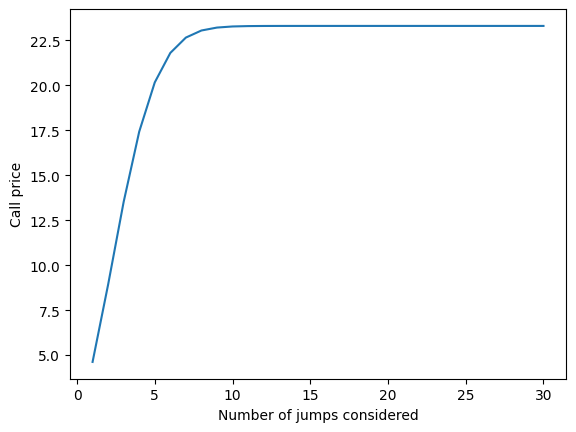

In [20]:
call_prices = []
for n in range(1, 31):
    call_prices.append(call_jd_model_price(S0=S0, r=r, sigma=sigma, K=K, T=T, lmbda_t=lmbda_t, mu_J=mu_J, sigma_J=sigma_J, N=n)[0])
plt.plot(range(1, 31), call_prices)
plt.xlabel("Number of jumps considered")
plt.ylabel("Call price")
plt.show()

Nous observons que le prix converge bien vers une valeur proche de 23.3

# **Question 3**

Implémenter le pricing Monte-Carlo du prix du call dans le modèle avec sauts et vérifier sa convergence vers le prix exact.

D'après les hypothèses, $1 + Y_i$ suit une loi log-normale de paramètres $(\sigma_J, e^{\mu_J})$

In [43]:
def MC_jumps(mu_J: float, sigma_J: float, N: int, n: int) -> np.ndarray:
    """
    Simulates the jumps in the jump diffusion model for Monte Carlo pricing

    **INPUT:**
        - mu_J: mean of the lognormal distribution
        - sigma_J: std of the lognormal distribution
        - N: maximum number of jumps in the model
        - n: number of observations per jump

    **OUTPUT:**
        - MC_jumps_array: array containing the simulated jumps
    """
    MC_jumps_array = np.insert(lognorm.rvs(s=sigma_J, scale=exp(mu_J), size=(n, N)), 0, 1, axis=1).cumprod(axis=1)
    return MC_jumps_array


def call_jd_model_MC_price(S0: float, r: float, sigma: float, K: float, T: float, lmbda_t: float, mu_J: float, sigma_J: float, N: int, n: int):
    """
    """
    MC_jumps_array = MC_jumps(mu_J=mu_J, sigma_J=sigma_J, N=N, n=n)
    
    # Working out the BS call prices for the different number of jumps
    beta_t = exp(mu_J + ((sigma_J ** 2) / 2)) - 1
    S0_jumps = S0 * exp(-beta_t * lmbda_t * T) * MC_jumps_array
    d1_jumps = 1 / (sigma * np.sqrt(T)) * (np.log(S0_jumps / K) + (r + sigma**2 / 2) * T)
    d2_jumps = d1_jumps - sigma * np.sqrt(T)
    BS_prices = S0_jumps * norm.cdf(d1_jumps) - K * np.exp(-r * T) * norm.cdf(d2_jumps)

    # Probability distributions for poisson
    probs = [exp(- lmbda_t * T) * ((lmbda_t  *T) ** j) / factorial(j) for j in range(N+1)]
    return np.dot(probs, BS_prices.mean(axis=0))

call_MC_price = call_jd_model_MC_price(S0=S0, r=r, sigma=sigma, K=K, T=T, lmbda_t=lmbda_t, mu_J=mu_J, sigma_J=sigma_J, N=30, n=30000)
print(call_MC_price)

23.21359593008722


Pour $n=10^7$, nous retombons bien sur la valeur obtenue avec la formule explicite.

# **Question 4**

Tracer le smile de volatilité implicite engendré par le modèle à sauts et analyser. Commenter.

On commence par calculer les différents prix de calls dans le modèle à saut, pour ensuite en déduire les volatilités implicites avec une méthode de dichotomie.

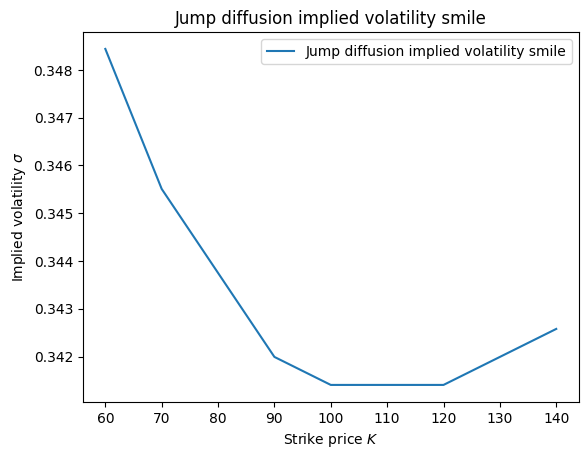

In [45]:
def implied_vol(C_market, S0, K, T, r, eps = 0.01):
    """
    Calculates the implied volatility of a Black & Scholes call
    using a dichotomy method

    **INPUT**
    - C_market: European call market price
    - S0: Current price of the underlying
    - K: Strike price of the call
    - T: maturity of the call
    - r: risk free rate
    - eps: error margin for when to stop the dichotomy

    **OUTPUT**

    """
    # Testing if implied volatility can be worked out

    lower_call_bound = np.maximum(S0 - K * np.exp(-r * T), 0)
    upper_call_bound = S0
    if (C_market < lower_call_bound) or (C_market > upper_call_bound):
        print("Market price is out of bounds for unique volatility")
        return None
    
    # Initialization of lower and upper bounds for sigma
    l_sigma = 0.1
    while call_price_black_scholes(K=K, T=T, S0=S0, r=r, sigma=l_sigma) > C_market:
        l_sigma /=2
    u_sigma = 0.4
    while call_price_black_scholes(K=K, T=T, S0=S0, r=r, sigma=u_sigma) < C_market:
        u_sigma *= 2

    # Initialization
    sigma = (l_sigma + u_sigma)/2
    c_est = call_price_black_scholes(K=K, T=T, S0=S0, r=r, sigma=sigma)
    c_diff = C_market - c_est
    

    while (abs(c_diff) > eps):
        if c_diff > 0:
            # volatility is too low in this case
            l_sigma = sigma
        else:
            # volatility is too high
            u_sigma = sigma
        sigma = (l_sigma + u_sigma) / 2
        c_est = call_price_black_scholes(K=K, T=T, S0=S0, r=r, sigma=sigma)
        c_diff = C_market - c_est
    return sigma

l_k = [10*k for k in range(6, 15)]
l_implied_vols = []
for k in l_k:
    c_jd = call_price = call_jd_model_price(S0=S0, r=r, sigma=sigma, K=k, T=T, lmbda_t=lmbda_t, mu_J=mu_J, sigma_J=sigma_J)
    k_implied_vol = implied_vol(C_market=c_jd, S0=S0, K=k, T=T, r=r)
    l_implied_vols.append(k_implied_vol)
plt.plot(l_k, l_implied_vols, label="Jump diffusion implied volatility smile")
plt.title("Jump diffusion implied volatility smile")
plt.ylabel("Implied volatility $\sigma$")
plt.xlabel("Strike price $K$")
plt.legend()
plt.show()

Nous pouvons voir que la volatilité implicite reste bien plus haute dans ce modèle que celle dans un modèle de Heston par exemple. Ceci est lié au fait que les sauts introduisent plus de volatilité dans le modèle, ce qui a donc pour conséquence d'augmenter les prix des calls dans le cadre du modèle, et donc par conséquent d'augmenter la valeur de la volatilité implicite.